<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-equivalent-of-Welch's-t-test" data-toc-modified-id="Bayesian-estimation-equivalent-of-Welch's-t-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation equivalent of Welch's t-test</a></span><ul class="toc-item"><li><span><a href="#The-classic-Welch's-t-test" data-toc-modified-id="The-classic-Welch's-t-test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The classic Welch's t-test</a></span></li></ul></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Data-overview-and-study-description" data-toc-modified-id="Data-overview-and-study-description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data overview and study description</a></span></li><li><span><a href="#Exploraory-data-analysis-and-visualisation" data-toc-modified-id="Exploraory-data-analysis-and-visualisation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploraory data analysis and visualisation</a></span></li></ul></li><li><span><a href="#Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{i}-&amp;\sim-Normal(\mu_{i},-\sigma_{k}-)-
\\-\mu_{i}-&amp;=\alpha_k
\\-\alpha_k-&amp;\sim-HalfNormal(0,-2.5)-\hspace{0.2cm}-for-\hspace{0.2cm}-1...k
\\-\sigma_{k}-&amp;\sim-Exponential(1)-\hspace{0.2cm}for-\hspace{0.5cm}k\hspace{0.2cm}-1...k
\end{align*}" data-toc-modified-id="Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{i}-&amp;\sim-Normal(\mu_{i},-\sigma_{k}-)-
\\-\mu_{i}-&amp;=\alpha_k
\\-\alpha_k-&amp;\sim-HalfNormal(0,-2.5)-\hspace{0.2cm}-for-\hspace{0.2cm}-1...k
\\-\sigma_{k}-&amp;\sim-Exponential(1)-\hspace{0.2cm}for-\hspace{0.5cm}k\hspace{0.2cm}-1...k
\end{align*}-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 2 - Define the descriptive statistical model <script type="math/tex; mode=display" id="MathJax-Element-921">\begin{align*}
y_{i} &\sim Normal(\mu_{i}, \sigma_{k} ) 
\\ \mu_{i} &=\alpha_k
\\ \alpha_k &\sim HalfNormal(0, 2.5) \hspace{0.2cm} for \hspace{0.2cm} 1...k
\\ \sigma_{k} &\sim Exponential(1) \hspace{0.2cm}for \hspace{0.5cm}k\hspace{0.2cm} 1...k
\end{align*}</script></a></span></li><li><span><a href="#Step-3---Specifying-priors" data-toc-modified-id="Step-3---Specifying-priors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 3 - Specifying priors</a></span></li><li><span><a href="#Step-4---Use-Bayes-rule" data-toc-modified-id="Step-4---Use-Bayes-rule-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 4 - Use Bayes rule</a></span><ul class="toc-item"><li><span><a href="#Stan-model-of-Bayesian-Welch's-t-test" data-toc-modified-id="Stan-model-of-Bayesian-Welch's-t-test-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Stan model of Bayesian Welch's t-test</a></span></li></ul></li><li><span><a href="#Post-model-fit-visualisations---Bayesian-one-sample-Z-test" data-toc-modified-id="Post-model-fit-visualisations---Bayesian-one-sample-Z-test-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Post model fit-visualisations - Bayesian one sample Z-test</a></span><ul class="toc-item"><li><span><a href="#Posterior-plots" data-toc-modified-id="Posterior-plots-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Posterior plots</a></span><ul class="toc-item"><li><span><a href="#Differnces-in-sigma" data-toc-modified-id="Differnces-in-sigma-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Differnces in sigma</a></span></li></ul></li><li><span><a href="#Autocorrelation-plots" data-toc-modified-id="Autocorrelation-plots-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Autocorrelation plots</a></span></li><li><span><a href="#MCMC-traceplots" data-toc-modified-id="MCMC-traceplots-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>MCMC traceplots</a></span></li><li><span><a href="#Posterior-predictive-checks" data-toc-modified-id="Posterior-predictive-checks-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Posterior predictive checks</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [42]:
# Import analysis packages
%matplotlib inline
import stan as ps
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
import scipy.stats as ss
import arviz

import nest_asyncio
nest_asyncio.apply()

In [35]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation equivalent of Welch's t-test

## The classic Welch's t-test

In order to understand the Welch's t-test from classical statistics it is important to first outline the student t-test (apologise to any readers who have already read the Bayesian estimation of between subkects t-test notebook but this is essentially all repetition).

The student t-test in formula form can be denoted as $$\large t = \frac{m_1-m_2}{\sqrt{\frac{S^2}{n_1}+\frac{S^2}{n_2}}}$$

$m_1, m_2 =$ the mean values for the two respective groups.

$n_1, n_2 =$ the sample size for the two respective groups.

and $S^2$ estimator for the variance of the two groups being analysed 

$$\large S^2 = \frac{\sum(x-m_1)^2 + \sum(x-m_2)^2}{n_1 + n_2 -2}$$

with the denominator $n_1 + n_2-2$ being the calculation of the degrees of freedom for the test.

One of the assumptions of the student t-test results then from this application of a pooled estimator. That assumption being the homogeneity of variance (homoscedasticity).

Like all assumptions then the big question is for any analysis should be are the assumptions reasonable within the application at hand. In recent years there has been arguements that the student t-test is inappropriate for research where variance between the two groups is unlikely (such as psychology/behavioural analysis), with  arguements that researchers should default to welch's t-test (Delacre, Lakens, & Leys, 2017). The importance of a default becomes clear in psychological research with the identifcation of the prolific use of t-tests within psychology (Wetzels, et al. 2011) considering the variety of statistical tools availible to researchers.

Nevertheless, the welch's t-test is different from the student t-test because it can analyse two groups of data within the classical statistics framework even in cases of heteroscedasticity.

The Welch's t-test in formula form can be denoted as $$\large t = \frac{m_1-m_2}{\sqrt{\frac{S_{1}^{2}}{n_1}+\frac{S_{2}^{2}}{n_2}}}$$

$S_{1}^{2}, S_{2}^{2}=$ Standard deviation of the the respective two groups

The df are calculated as  $$ df = \large(\frac{S_{1}^{2}}{n_1} + \frac{S_{2}^{2}}{n_2})^{2} / \frac{S_{1}^{4}}{n_1^{2}(n_1 -1)} + \frac{S_{2}^{4}}{n_2^{2}(n_2 -1)}) $$

# Bayesian inference
<font size = "3"> Following the quick description of the classic welch's t-test above its important to keep in mind that  inference within Bayesian data analysis is all derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to the Welch's t-test, it is fundamentally different, because it uses fully probabilistic modelling and, therefore, any resulting inferences are not based on sampling distributions.</font>
    
<font size = "1"> For a fuller description see the Practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. If scientific research publication is the goal, the priors must be acceptable to a skeptical audience of peer reviewers. Much of this can be achieved using prior predictive checks to acsertain if the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interpret the posterior for any statistical inferences.

5. Conduct model checks. i.e. Posterior predictive checks, to identify if the model is reasonable and therefore also check if the inferences are reasonable. </font> 

#  Step 1 - Identify the relevant data for question under investigation

## Data overview and study description

The data analysed below have been downloaded from https://drive.google.com/file/d/0Bz-rhZ21ShvOdW1wV0pmUTJSSk0/view. The orignal dataset is from a study conducted by Schroeder and Epley (2015). These researchers investigated whether the chance of employment would differ based on if indivduals verbally described there skills in the form of a little speech, or if that speech was in written form and the potential employer read the speech instead. The researchers predicted that because tone and pitch is availible to the spoken word more information of intellect would be conveyed than in the written words.

To test this 39 recruiters from fortune 500 companies were randomly assigned to one of two conditions. These two conditions were the audio and transcript conditions. More specifically the recruiters assigned to the audio condition  listened to an audio recording of the pitch, whereas in the transcript condition the recruiters read the same speech that the audio condition raters heard. Post hearing or reading of the pitch the recruiters produced rating on the candidate's: intelligence , competence, and thoughtfulness. With each attribute measure on scale between 0-10. These scores where then averaged to give an overall intellect score. With higher scores relating a higher intellect rating from the recruiters.

In [204]:
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/wip/Data/Schroeder%20and%20Epley%202015.csv"
#Generare apndas data frame with the study data
df = pd.read_csv(url)
df

,CONDITION,compt,thought,intell,like,pos,neg,hire,age,gender,...,pnum,meanhire,meanintellect,meanimpression,centhire,centintellect,centimpression,Intellect_Rating,Impression_Rating,Hire_Rating
0,1,7,7,7,7,7,1,7,29,2,...,1,4.583333,5.722222,6.638889,2.416667,1.277778,1.361111,6.000000,7.000000,6
1,1,6,8,6,6,6,6,5,27,2,...,2,4.666667,5.577778,5.777778,0.333333,1.088889,-0.111111,5.666667,4.666667,4
2,1,7,8,6,9,9,1,6,27,2,...,3,4.666667,5.577778,5.777778,1.333333,1.422222,3.555556,6.000000,8.333333,5
3,0,4,3,6,6,6,6,5,40,2,...,4,4.583333,5.722222,6.638889,0.416667,-1.388889,-0.972222,3.333333,4.666667,4
4,0,2,3,1,2,2,8,2,32,2,...,5,4.583333,5.722222,6.638889,-2.583333,-3.722222,-4.305556,1.000000,1.333333,1
5,0,3,3,3,2,2,6,2,24,2,...,6,4.666667,5.577778,5.777778,-2.666667,-2.577778,-2.777778,2.000000,2.000000,1
6,1,5,4,5,4,2,6,2,29,2,...,7,5.416667,5.888889,5.944444,-3.416667,-1.222222,-2.277778,3.666667,2.666667,1
7,0,2,3,3,3,2,8,3,23,2,...,8,5.416667,5.888889,5.944444,-2.416667,-3.222222,-3.277778,1.666667,1.666667,2
8,1,6,6,6,4,4,3,4,28,2,...,9,4.666667,5.577778,5.777778,-0.666667,0.422222,-0.444444,5.000000,4.333333,3
9,0,4,6,4,4,4,8,3,34,2,...,10,4.583333,5.722222,6.638889,-1.583333,-1.055556,-2.972222,3.666667,2.666667,2


The two elements crucial to identify here from the dataframe is the condition column where the condition 0 is the transcript condition and condition 1 is the audio condition and the avearged intellect rating score.

## Exploratory data analysis and visualisation

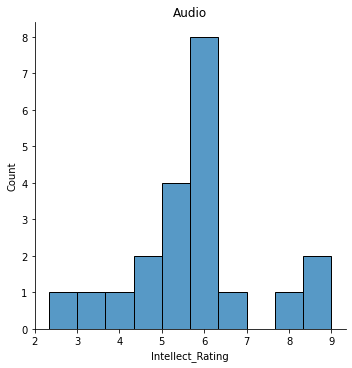

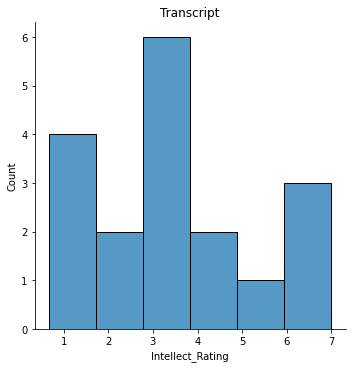

In [248]:
# Plot histograms of the data
sns.displot( df[df['CONDITION'] == 1]['Intellect_Rating']).set(title = 'Audio');
sns.displot( df[df['CONDITION'] == 2]['Intellect_Rating'] ).set(title= 'Transcript');

A visual inspection of the histograms shows that at least for the observed samples there might be a difference in the variability of the two indepedent conditions and thus the data may be a candidate for welch's t-test under the classical statistical framework. In the case of Bayesian model applied below our assumption of heteroscedasticity will be baked into out model in our attempt to model the data generating process (and to conduct ifernce on the standard deviation). In the case of recruiters ratings by audio or transcript a difference in the variability of ratings data between two indepedent conditions seems reasonable.

# Step 2 - Define the descriptive statistical model \begin{align*}
y_{ik} &\sim Normal(\mu_{k}, \sigma_{k} ) 
\\ \mu_{k} &=\alpha_k
\\ \alpha_k &\sim Normal(5, 1.5) \hspace{0.2cm}, \hspace{0.2cm} 1...k
\\ \sigma_{k} &\sim Exponential(.5) \hspace{0.2cm}, \hspace{0.5cm}\hspace{0.2cm} 1...k
\end{align*} 

<font size = "3">The formulation for presenting statistical models here follows that used by McElreath (2020) for its intuitive nature. In plain english the model specifies that the dependent variable $y_{ik}$ of the raters averaged composite intellect rating for the two independent groups are distributed normally in terms of the Likelihood an unkown $\mu_k$ that is to be estimated with a normal prior probability distribution on $\mu_k$ that has the prior vaues of $\mu = 5$ and $ \sigma = 1.5$ and the $\sigma_k$ parameters follow an Exponential distribution that has the prior value of = .5 on the $\lambda$ parameter</font>

# Step 3 - Specifying priors

The priors specified above have been determined through the use of the prior predictive checks below.

### Prior predictive checks

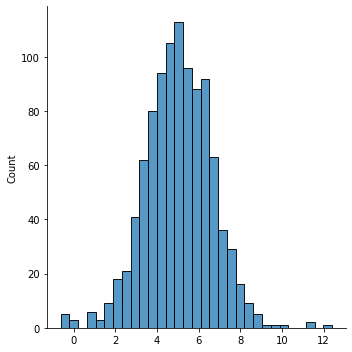

In [227]:
# Set random seed for replicability of the notebook.
np.random.seed(1)

# Set the number of samples from the prior predictive distribution. 
samples = 1000

# Take samples from the priors for the model.
alpha = np.randomom.normal(loc = 5, scale = 1.5, size = samples)
sigma = np.random.exponential(.5, size = samples)

# Simulate data from the model.
prior_dis  = np.random.normal(alpha, sigma, size = samples)

# Plot the prior predictive distribution.
sns.displot(prior_dis);

The prior predictive distribution above show that data based on the model and the priors selected for the parameters can take values from between just below 0 and just above 10 depending on the simulation. However, the stable  majority of simulated values fall between around 0 and 10 (around 95% of the values as normal likelihood is used). In additon the model also thinks that the mean for DGP is around 5, which makes sense as the intellect rating scores is a composite average of the component scales bounded between 0 and 10 it also bakes in some skepticism as it suggests that the two group means are similar before seeing the data. Therefore, the data has to convince the analyst otherwise.

Critically, this is what the model thinks of the data generating process before seeing the data. The overall message then is that you can always use do better than 'flat priors' if you think about the modelling problem (McElreath, 2020).

# Step 4 - Use Bayes rule

## Stan model of Bayesian Welch's t-test

In [232]:
Welch_t_model = """

data{

int<lower = 1> N; // Number of data points
vector[N] y; // Vector of data points in long format for both groups
int K; // Number of groups
int<lower = 1, upper = K> x[N]; // Array of interger values of the indicator variable for each group

// Prior values
real mu_mu;
real mu_sigma;
real lamda;
}

parameters{

// The Model parameters to be estimated.
 vector[K] mu; // mean parameters bound at 0
 vector<lower = 0>[K] sigma; //Standard deviation bounded at 0
 
}

model{

// Priors
// Because the parameters are bounded above the normal prior 
// on the mu parameter is actually halfnormal and the priors are vectorised
mu ~ normal(mu_mu, mu_sigma);
sigma ~ exponential(lamda);

// Likelihood
y ~ normal(mu[x], sigma[x]);

}

generated quantities{

// Calculate difference and effect size (Cohens D) with the posterior distributions.
real diff = mu[1] - mu[2];

// Cohen D for Welch t-test formula uses variance so the parameter is sigma squared below.
real Cohen_D = diff / ( sqrt(((sigma[1]^2) + (sigma[2]^2)/2)) );

// Create variable for posterior predictive samples.
real yrep[N];
  
// Generate data for posterior samples
    yrep = normal_rng(mu[x], sigma[x]);
 
}
"""

In [233]:
df["CONDITION"].replace({0: 2}, inplace=True)
data = {'N': len(df),
        'y': df["Intellect_Rating"].values,
        'K': 2,
        'x': df["CONDITION"].values,
        'mu_mu': 5.0,
        'mu_sigma': 1.5,
        'lamda': 0.5
        }

In [241]:
# Stans' build function can be called and be passed the model string specified above to be compiled into C++ code.
# Warning below are not correct the prior values are set in the data block
sm  = ps.build(Welch_t_model, data = data)

Building...



Building: found in cache, done.Messages from stanc:


In [242]:
fit = sm.sample(num_chains = 4, num_samples = 1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale

In [243]:
fit_df = fit.to_frame()
fit_df.head(3)

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu.1,mu.2,sigma.1,...,yrep.30,yrep.31,yrep.32,yrep.33,yrep.34,yrep.35,yrep.36,yrep.37,yrep.38,yrep.39
draws,,,,,,,,,,,,,,,,,,,,,
0,-43.037743,0.998872,0.562588,2.0,3.0,0.0,45.279520,4.955683,3.878016,1.757206,...,1.336599,4.571045,4.688770,2.427729,3.001057,3.594064,7.539194,3.808153,5.615829,3.273757
1,-43.707030,0.974246,0.687180,2.0,7.0,0.0,48.306652,6.341440,3.730840,1.928086,...,5.289844,2.683510,3.776486,7.991664,5.556687,4.560020,8.699101,2.497987,10.582402,5.795596
2,-42.439162,1.000000,0.738255,2.0,3.0,0.0,43.725718,6.033472,3.514848,1.631416,...,7.715496,8.692294,2.449051,4.506980,4.154579,4.710170,5.909759,0.873106,7.613034,5.549411


In [244]:
summ = az.summary(fit, var_names = ['mu', 'sigma', 'diff', 'Cohen_D'])
summ

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],5.603,0.355,4.916,6.273,0.005,0.004,4417.0,2930.0,1.0
mu[1],3.767,0.457,2.924,4.668,0.008,0.006,3712.0,2125.0,1.0
sigma[0],1.673,0.265,1.197,2.153,0.005,0.003,3744.0,2639.0,1.0
sigma[1],1.997,0.368,1.398,2.677,0.006,0.005,3952.0,2560.0,1.0
diff,1.836,0.574,0.805,2.946,0.009,0.006,3926.0,2355.0,1.0
Cohen_D,0.846,0.282,0.320,1.361,0.005,0.003,3761.0,2425.0,1.0


The summary of the MCMC samples suggest convergence with all r-hat values < 1.05 and the effective sample size > 400 (Vehtari et al. 2019).

# Post model fit-visualisations - Bayesian Welch's t-test
The arviz package offers many useful functions for plotting MCMC samples of the posteriors produced by Bayesian data analysis with Stan.

## Posterior plots

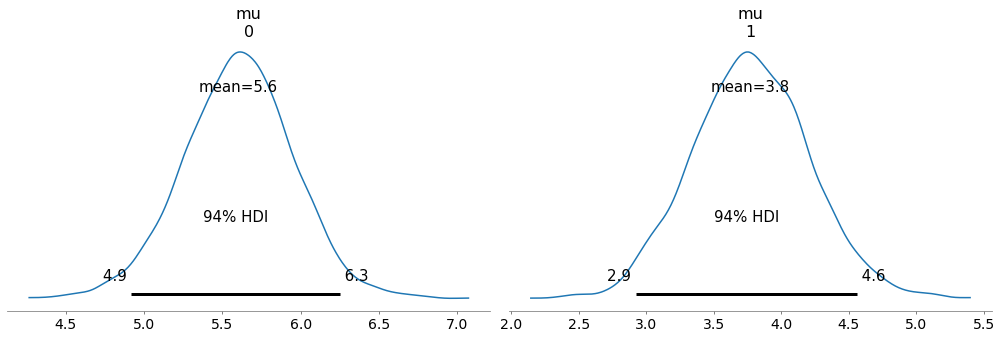

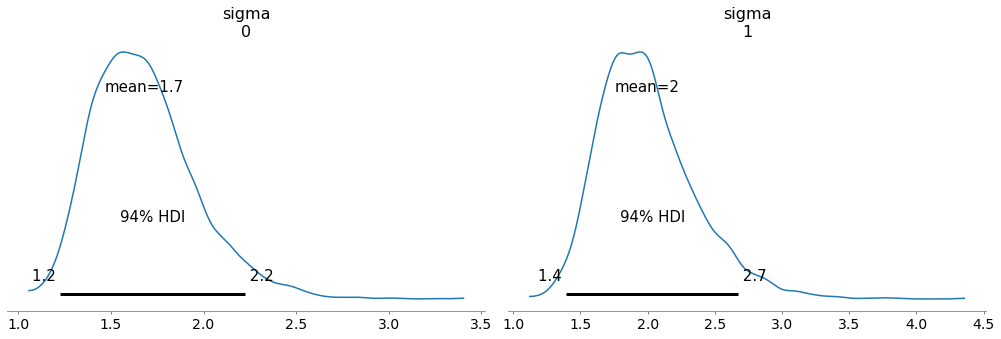

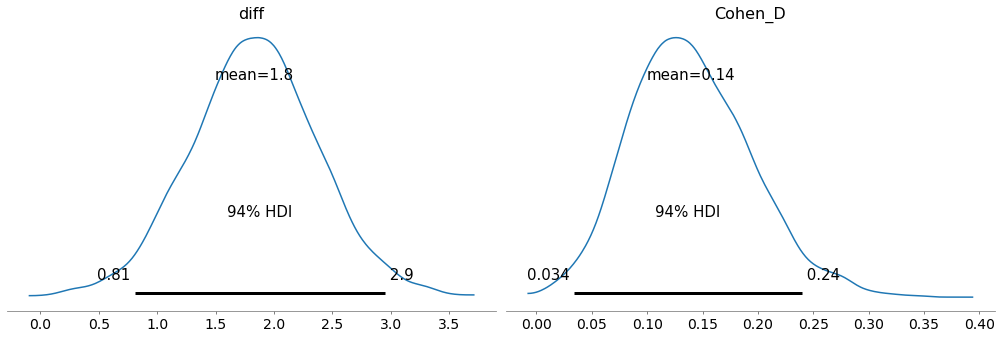

In [86]:
# Using the arviz package the posteriors can be plotted from the MCMC samples
az.plot_posterior(fit, var_names=("mu"));
az.plot_posterior(fit, var_names=("sigma"));
az.plot_posterior(fit, var_names=("diff",
                                  "Cohen_D"));

## Autocorrelation plots

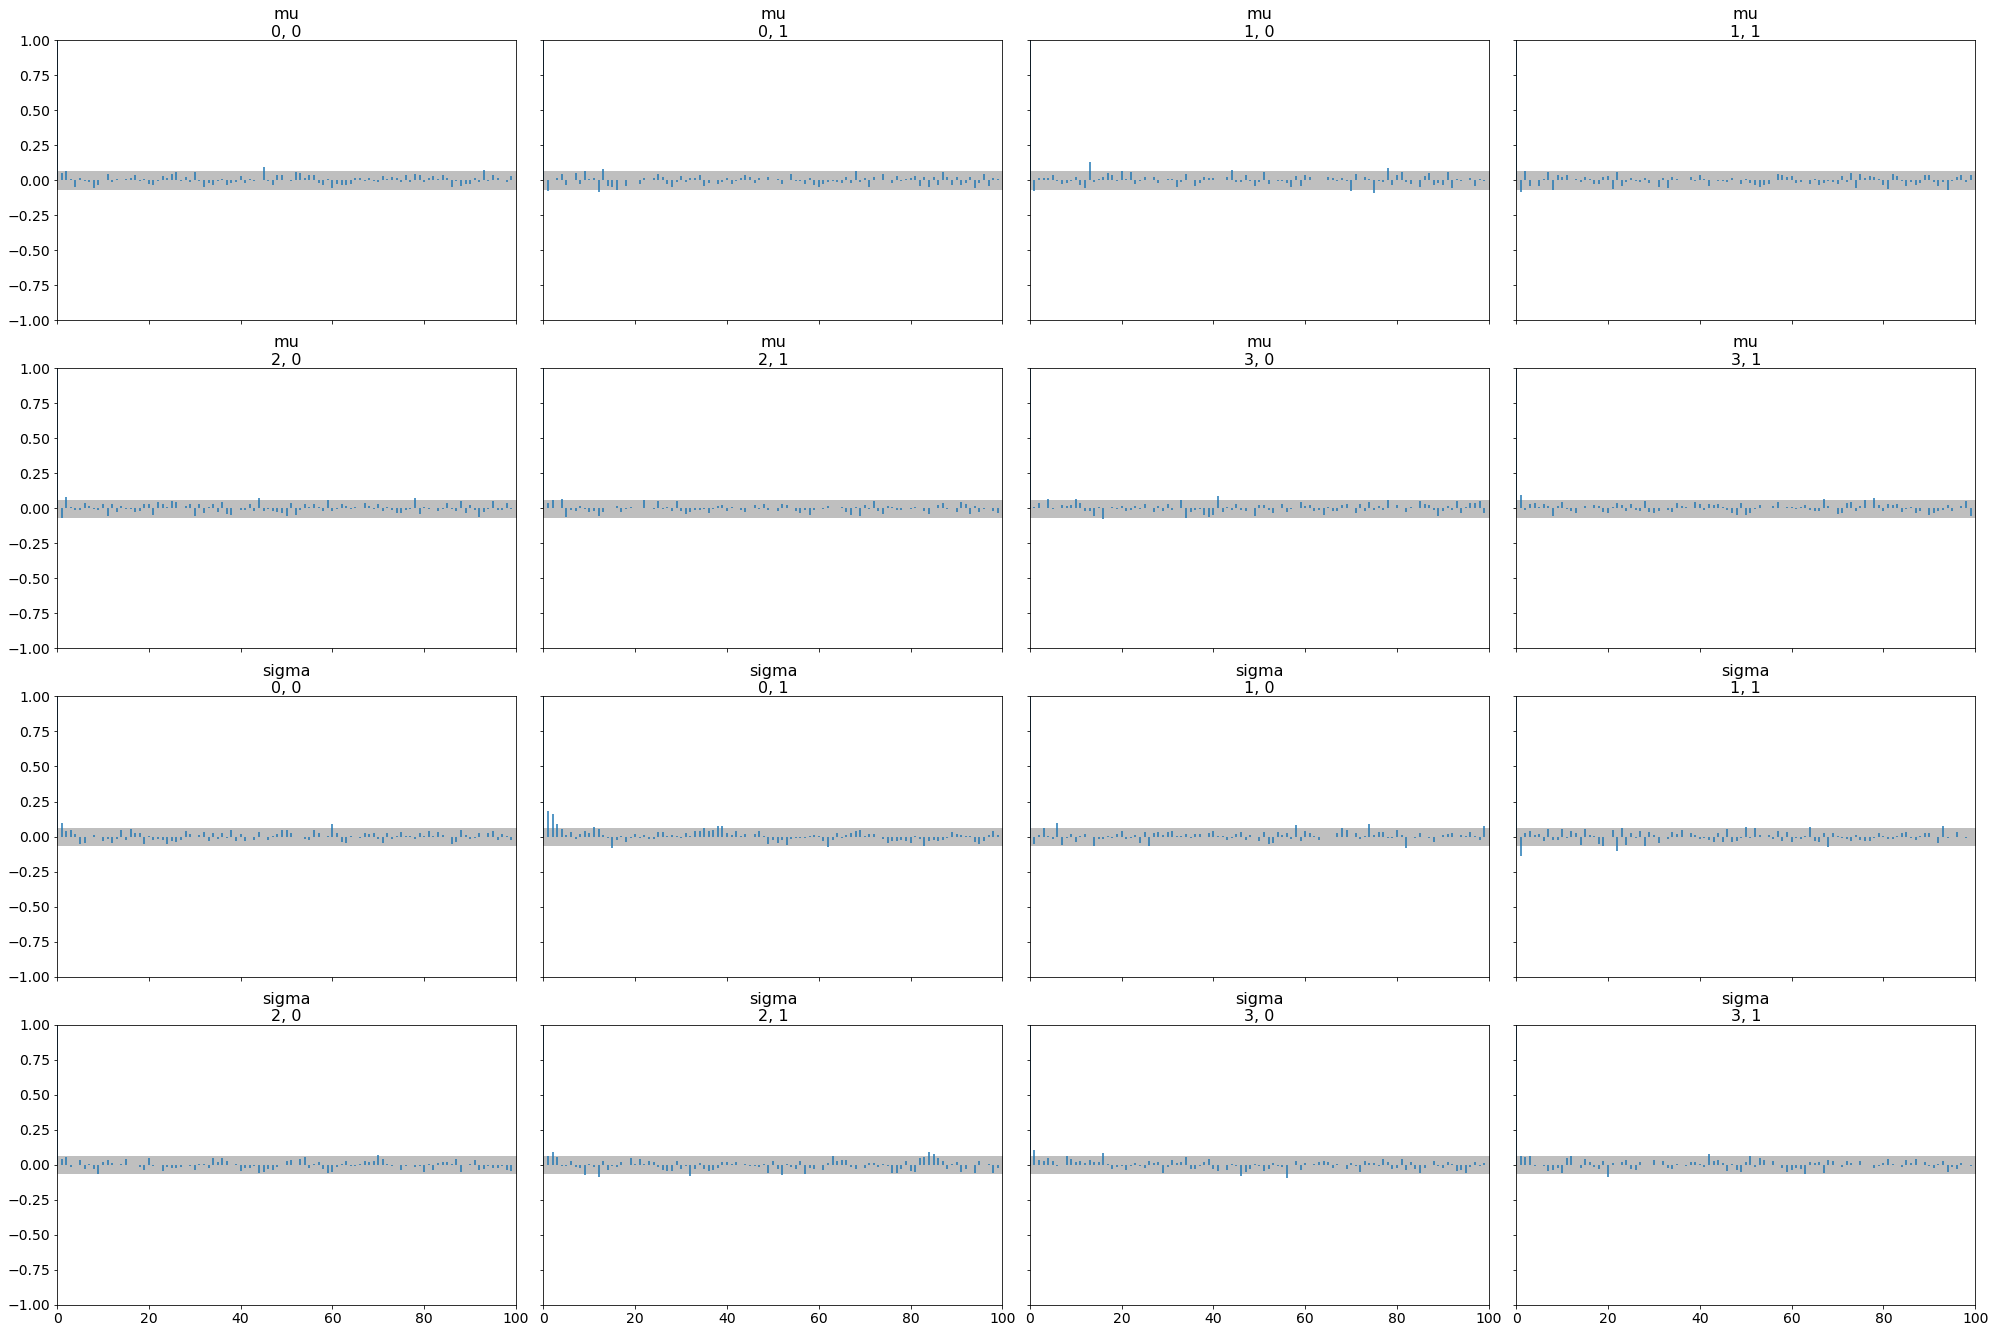

In [219]:
# Using the arviz package the autocorrelation of the 4 MCMC chains can be plotted.
az.plot_autocorr(fit, var_names=("mu", 'sigma'));

The autocorrelation plots appear good with the autocorrelation quickly dropping to 0.

##  MCMC traceplots

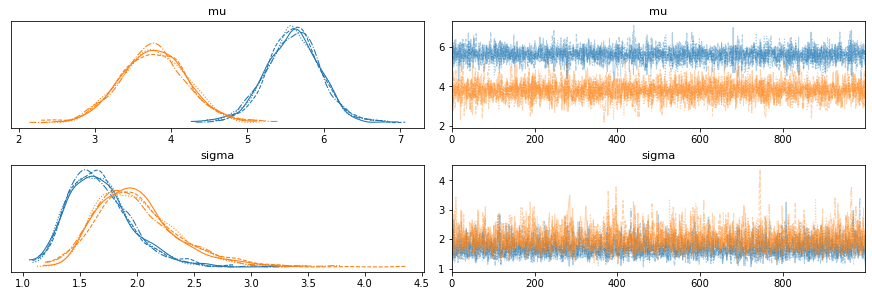

In [45]:
# Using the arviz package the traceplots of the 4 MCMC chains can be plotted.
az.plot_trace(fit, var_names=("mu", "sigma"));

The traceplots do not show an visual pathologies and show good mixing of chains and show a "hairy catepillar"

## Posterior predictive checks

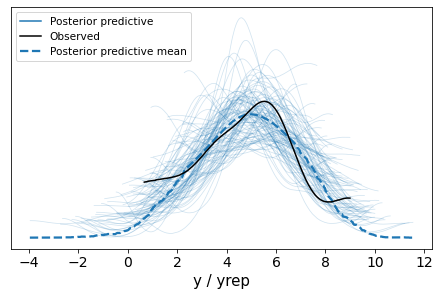

In [245]:
# Convert the pystan object into Arviz inference object for use in plotting functions
i_data = az.from_pystan(
                posterior=fit,
                posterior_model = sm,
                posterior_predictive = ['yrep'],
                observed_data= 'y')

# Set seed for reprodubility of notebook but aware there many potential samples.
np.random.seed(1)  
az.plot_ppc(i_data, data_pairs = {"y" : "yrep"}, num_pp_samples = 100);

The posterior predictive checks shows variation in generated data from model when compared observed data, this may suggest need for more modelling (there seems to be some probability leakage - predicting impossible values from DGP with values < 0 and > 10, but most values fall between 0 and 10), see Briggs for further discussion of this. At the same time these predictions may simple reflect the small sammple size from a niche population of fortune 500 recruiters resulting in a model that is uncertain about the parameter estimates to the extent that acurate prediction is difficult.

## Identifiabilty of parameters - from priors to posteriors

In [192]:
# Note to continu working out this function
#def priorpostoverlap(prior, posterior):
    
    
    #n_breaks = np.ceil(np.diff([np.min(posterior), np.max(posterior)]) / np.diff(az.hdi(posterior) / 18))
    #breaks = np.linspace(start = np.min(posterior), stop = np.max(posterior), num = int(n_breaks))
    
   # posthistinfo = np.histogram(posterior, bins = breaks, density = True)
    
   #breaks = np.insert(breaks, 0, float('-inf'))
   # breaks = np.append(breaks, float('inf'))
    
   # priorhistinfo = np.histogram(prior, bins = breaks, density = True)
    
   #minHt = np.minimum(priorhistinfo[0], posthistinfo[0])
   # overlap = sum(minHt * np.diff(breaks))
    
   # print(overlap)

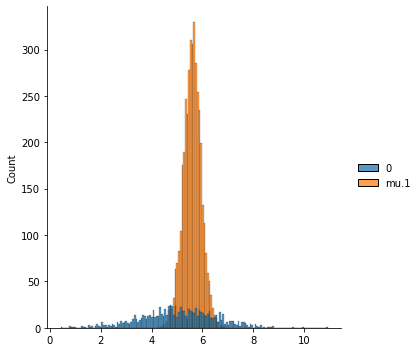

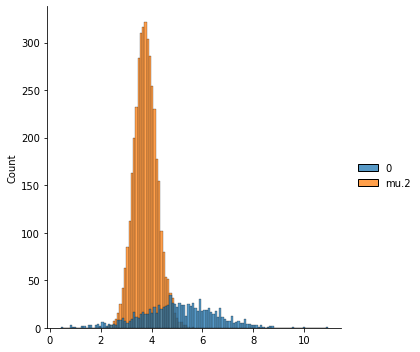

In [238]:
sns.displot([alpha, fit_df['mu.1']]);
sns.displot([alpha, fit_df['mu.2']]);

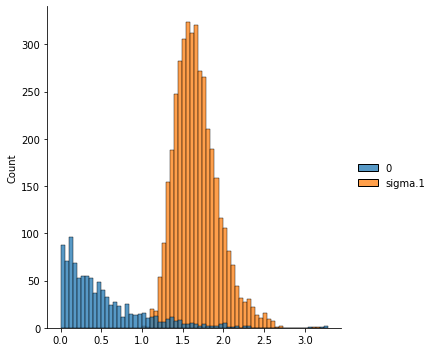

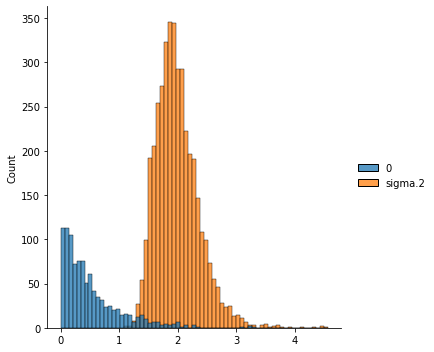

In [247]:
sns.displot([sigma, fit_df['sigma.1']]);
sns.displot([sigma, fit_df['sigma.2']]);

# Reporting the results of the Bayesian Welch's t-test equivalent

<font size = "3">As Kruscke (2015) correctly points out there is no standard formula or presentation method for presenting the results from Bayesian data analyses for journal articles, like the APA guide for reporting frequentist analyses. It is likely there never will be, because as McElreath (2020) explains Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2017) argue visualisations maybe even more key than written descriptions , so the all the visualistions above would likely have to be included with any write up. Anyway, the write up below generally follows the advice of Kruscke (2015) chapter 25. In any application though it comes down to the problem to be described and satisfying the (scientific) audience of the work. </p><br/>

<h2>Write up of Welch t-test model</h2><br/>

The independent composite intellect rating scores from the Fortune 500 recuriters were analysed using the statistical model defined above. The model had independent $\mu$ and $\sigma$ parameters for the two conditions of audio and transcript. Each of these four parameter had an independent prior, but the priors for the $mu's$ were the same, as was the case with the $\sigma's$. The priors were elicated through the use of prior predictive checks and the bounded observable data space in that the intellect ratings score had to fall between 0 and 10, following the general advice from McElreath (2020). See, prior predictive simulations above.

Four MCMC chains were ran each taking 2000 samples of the posterior. 1000 of the samples from each chain were used as warmup and discarded from the final analysis. Convergence of the MCMC chains was examined through the use of autocorrelation and traceplots. Visual inspection suggested no issues in terms of autocorrelation or chain mixing and generaly accpeted metric of r-hat < 1.05 and effective smaple size > 400 were achieved for all parameters (see, Vehtrai et al. for further discussion). The posteriors showed that the most credible values for the audio condition $mu$ parameter for intellect ratings were $\mu$ = 5.60 with a 97% CrI [4.92, 6.27]) and for the transcript condition intellect ratings $\mu$ = 3.77 with a 97% CrI [2.92, 4.67])  The unstandardised posterior difference between the two groups showed credible values of $\mu$ = 1.83 with a 97% CrI [.81, 2.95]). The standardised Cohens D posterior score credible values were $\mu$ = -.85, with a 97% CrI [.32, 1.36]). Under the model used in the analysis. The model also allowed for comparison between the estimated $sigma$ parameters for both conditions. For the audio condition the the most credible values were $mu$ = 1.67, with a 97% CrI [1.20, 2.95] and for the transcript condition intellect ratings $\mu$ = 2.00, with a 97% CrI [1.40, 2.68]. In this analysis the 97% Credible intervals were used as a default based on the Arviz package default specification.

The posterior predictive checks, however, do suggest that the model used has a relatively poor fit to the data. In addition, the predictions from the model would suggest alot of uncertainty under the fitted model with impossible predictions being made for the data generating process (values < 0 and > 10). This could suggest the use of different model or too simple proceed with caution for any inferences out of sample under this model due to the various contributors to the predictive uncertainty.

# References

Briggs, W. M. (2012). On Probability Leakage. arXiv preprint arXiv:1201.3611.

Delacre, M., Lakens, D., & Leys, C. (2017). Why psychologists should by default use Welch’s t-test instead of Student’s t-test. International Review of Social Psychology, 30(1).

Kruschke, J. (2015). Doing Bayesian data analysis: A tutorial with R, JAGS and Stan. Oxford, England: Academic Press.    
    
McElreath, R. (2020). Statistical rethinking: A Bayesian course with examples in R and Stan. Boca Raton: CRC Press.

Schroeder, J., & Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a
job candidate’s appeal. Psychological Science, 26, 877-891.

Wetzels, R., Matzke, D., Lee, M. D., Rouder, J. N., Iverson, G. J., & Wagenmakers, E. J. (2011). Statistical evidence in experimental psychology: An empirical comparison using 855 t tests. Perspectives on Psychological Science, 6(3), 291-298.

Vehtari, A., Gelman, A., Simpson, D., Carpenter, B., & Bürkner, P. C. (2019). Rank-normalization, folding, and localization: An improved $\widehat {R} $ for assessing convergence of MCMC. arXiv preprint arXiv:1903.08008.

# Exercises for the readers

1. Using prior predicitve simulation generate a model that suggest that the fortune 500 raters are extremely critical and rate the audio/transcripts very low (e.g 2) with little variability between the ratings.


2. Fit the model with these priors and interpret the results and compare them with the model fit above. 